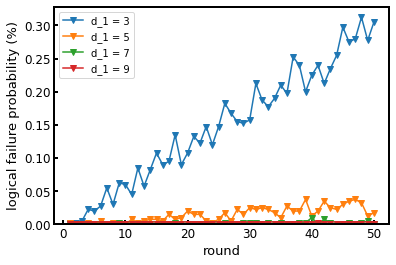

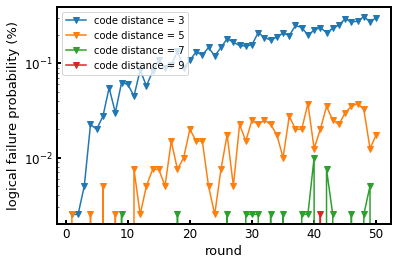

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################
# フォルダ名
folder = "p=0.001 ,eta=1000, d=(3,9,2), round=(1,50,1) , # of trials=200000" 
# ファイル名
file = "sample1" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition(SE)"

# csvファイルの読み込み
os.chdir(path+'/'+folder)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
#ind = data.index

# データフレームの列名(リスト)を取得
code_distance_list = data.columns

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="d_1 = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
ax.set_ylim(0,)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(0,)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
ax.set_yscale('log')
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

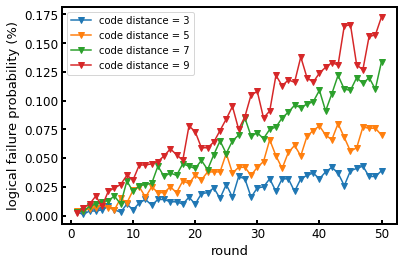

In [126]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()

## フィッティング

In [6]:
def logical_error_list(p,round_list):
    return 1/2 * (1-(1-2*p)**round_list)

def dif_loss_fun(data_list,logical_error_list,p,round_list):
    answer = 0
    data_list = np.array(data_list)
    for num in round_list:
        #print(num)
        answer += num * (1-2*p)**(num-1) * (logical_error_list[num-round_list[0]] - data_list[num-1])
    return answer

def fit(data_list,initial_p,round_list,trials,alpha):
    # trials：試行回数
    # alpha：学習率
    p = initial_p # pの初期値
    data_list = np.array(data_list)
    # ロス関数
    #for i in round_list:
        #loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,np.arange(1,round_list,1)))**2)
    for trial in range(trials):
        # pの更新
        p = p - alpha * dif_loss_fun(data_list,logical_error_list(p,round_list),p,round_list)
        #loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,round_list))**2)
        #print(p, loss_fun)
    return p

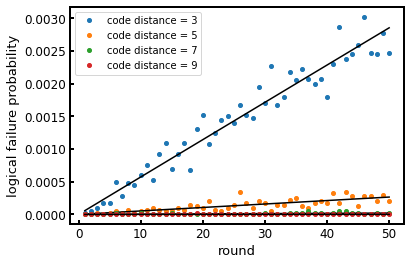

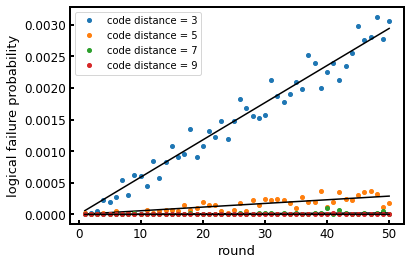

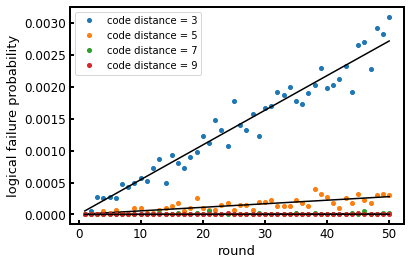

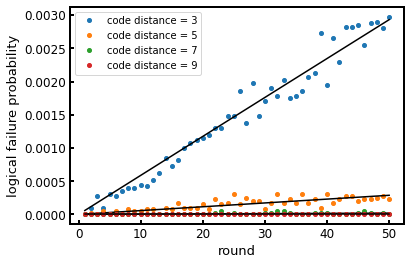

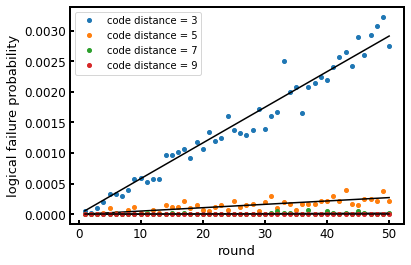

In [10]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

round_list = np.arange(1,51,1)

os.chdir(path+'/'+folder)
epsilon_matrix = []

for i in range(5):
    file = 'sample' + str(i) + '.csv'
    data = pd.read_csv(file, index_col=0)
    ss = 0
    epsilon_list = []
    fig, ax = plt.subplots()
    for code_distance in code_distance_list:
        ax.plot(round_list, data[code_distance][1::2],marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
        # フィッティング
        initial_p = 0.00001
        trials = 10000
        alpha = 0.00002
        fin_p = fit(data[code_distance][1::2],initial_p,round_list[10:],trials,alpha)
        ax.plot(round_list,logical_error_list(fin_p,round_list),marker='', color="k")
        ss += 1
        epsilon_list.append(fin_p)
    epsilon_matrix.append(epsilon_list)

    ax.set_xticks(np.arange(0,51,10))
    ax.set_xlabel("round", fontsize=13)
    ax.set_ylabel("logical failure probability", fontsize=13)
    #ax.set_xlim(9,11)
    #ax.set_ylim(12,17)
    ax.spines["top"].set_linewidth(2)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["right"].set_linewidth(2)
    ax.tick_params(direction="in", width=2, length=4, labelsize=12)
    #ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
    plt.legend()
    plt.show()

In [15]:
epsilon_matrix = np.array(epsilon_matrix)
print(epsilon_matrix)
mean = np.mean(epsilon_matrix, axis=0)
print(mean)
se = np.std(epsilon_matrix, axis=0) / np.sqrt(len(epsilon_matrix))
print(se)

[[5.72729053e-05 5.31136442e-06 4.10795381e-07 1.11659708e-08]
 [5.89741839e-05 5.79108778e-06 4.70153276e-07 2.40949877e-08]
 [5.45371522e-05 5.57238351e-06 2.50942642e-07 4.05501331e-08]
 [5.87887063e-05 5.75882518e-06 3.92577716e-07 2.28765760e-17]
 [5.83702085e-05 5.48890789e-06 3.91402028e-07 2.28765760e-17]]
[5.75886312e-05 5.58451376e-06 3.83174209e-07 1.51622183e-08]
[7.31628503e-07 7.92352155e-08 3.22301706e-08 6.92848123e-09]


In [14]:
print(len(epsilon_matrix))

5


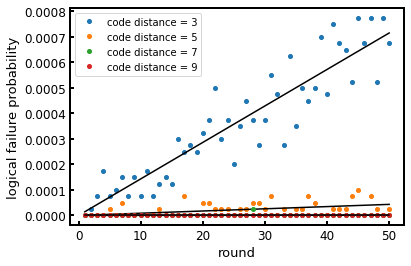

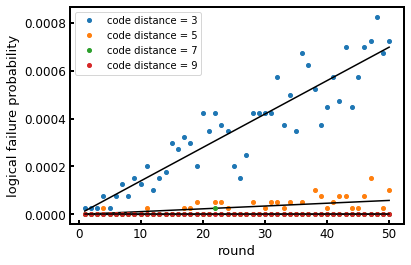

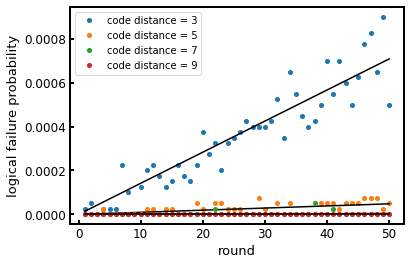

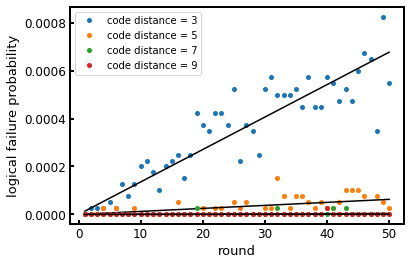

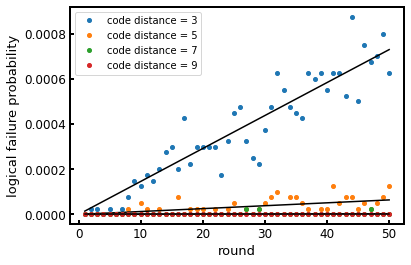

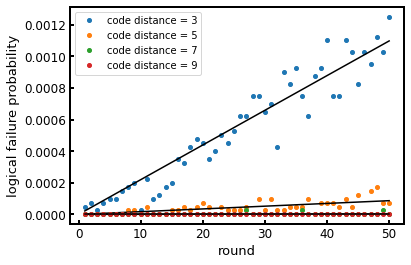

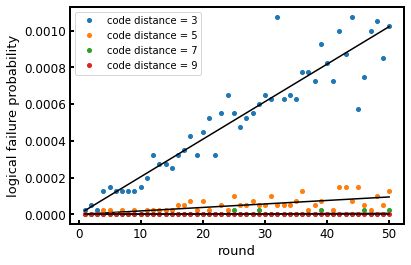

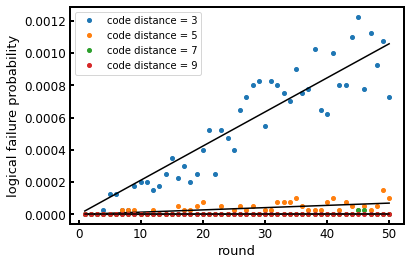

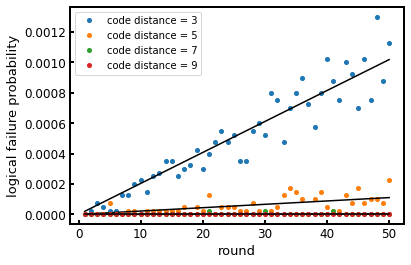

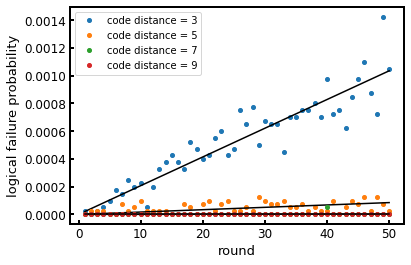

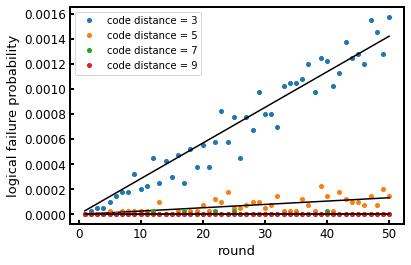

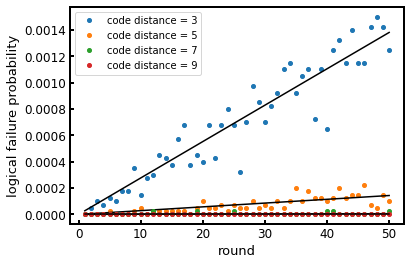

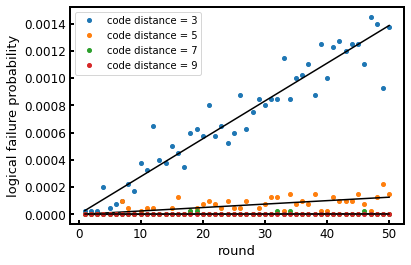

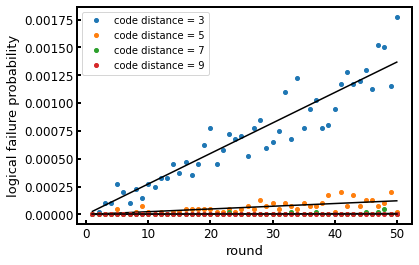

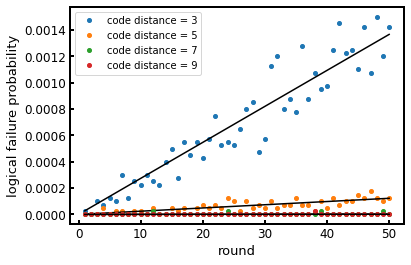

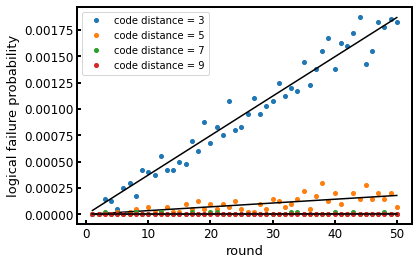

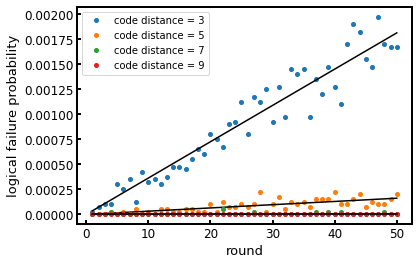

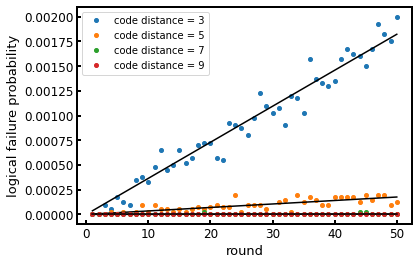

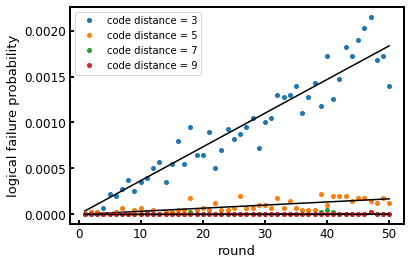

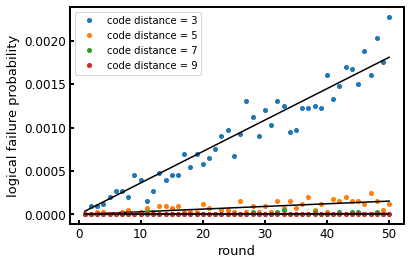

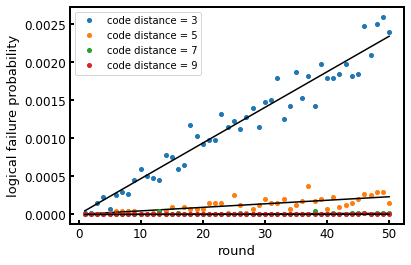

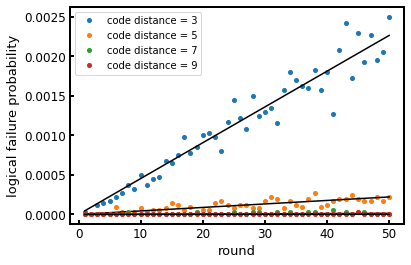

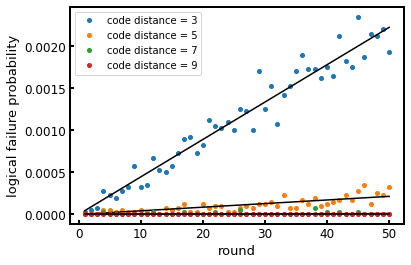

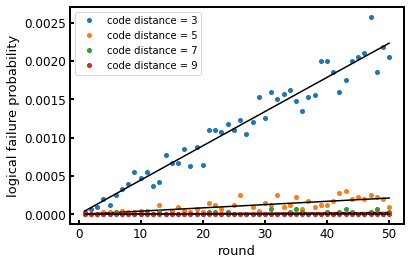

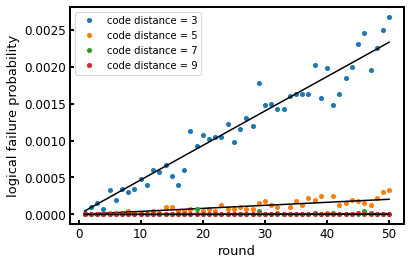

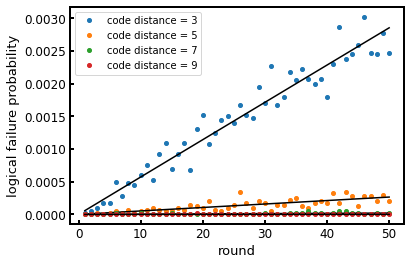

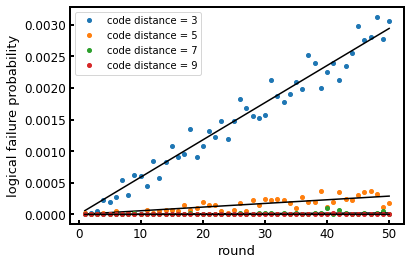

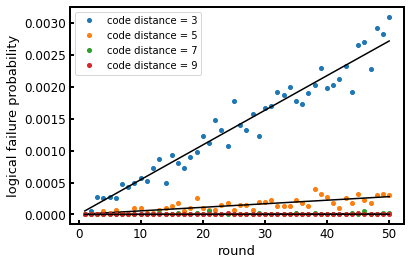

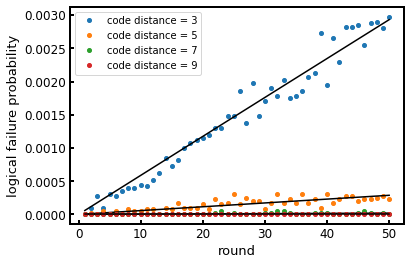

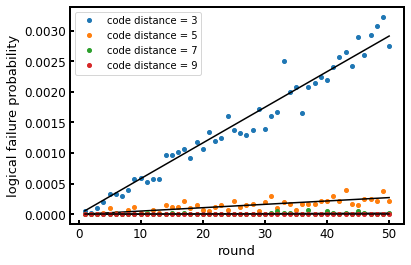

In [31]:
# フォルダ名
folder = "p=0.001 ,eta=1000, d=(3,9,2), round=(1,50,1) , # of trials=200000" 
# ファイル名
file = "sample1" + ".csv"
########################################

mean_matrix = np.array([])
se_matrix = np.array([])

for k, p in enumerate([0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]):
    folder = 'p=' + str(p) + " ,eta=1000, d=(3,9,2), round=(1,50,1) , # of trials=200000" 
    # csvファイルの読み込み
    os.chdir(path+'/'+folder)
    epsilon_matrix = []

    for i in range(5):
        file = 'sample' + str(i) + '.csv'
        data = pd.read_csv(file, index_col=0)
        ss = 0
        epsilon_list = []
        fig, ax = plt.subplots()
        for code_distance in code_distance_list:
            ax.plot(round_list, data[code_distance][1::2],marker='o',markersize=4,linewidth=0,label="code distance = "+str(code_distance))
            # フィッティング
            initial_p = 0.00001
            trials = 10000
            alpha = 0.00002
            fin_p = fit(data[code_distance][1::2],initial_p,round_list[10:],trials,alpha)
            ax.plot(round_list,logical_error_list(fin_p,round_list),marker='', color="k")
            ss += 1
            epsilon_list.append(fin_p)
        epsilon_matrix.append(epsilon_list)

        ax.set_xticks(np.arange(0,51,10))
        ax.set_xlabel("round", fontsize=13)
        ax.set_ylabel("logical failure probability", fontsize=13)
        #ax.set_xlim(9,11)
        #ax.set_ylim(12,17)
        ax.spines["top"].set_linewidth(2)
        ax.spines["left"].set_linewidth(2)
        ax.spines["bottom"].set_linewidth(2)
        ax.spines["right"].set_linewidth(2)
        ax.tick_params(direction="in", width=2, length=4, labelsize=12)
        #ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
        plt.legend()
        plt.show()
    
    epsilon_matrix = np.array(epsilon_matrix)
    mean = np.mean(epsilon_matrix, axis=0)
    se = np.std(epsilon_matrix, axis=0) / np.sqrt(len(epsilon_matrix))

    if k == 0:
        mean_matrix = mean[:, np.newaxis]
        se_matrix = se[:, np.newaxis]
    else:
        mean_matrix = np.append(mean_matrix, mean[:, np.newaxis], axis=0)
        se_matrix = np.append(se_matrix, se[:, np.newaxis], axis=0)
    
    os.chdir('../')

mean_matlix = mean_matrix.reshape(6, 4)
se_matlix = se_matrix.reshape(6, 4)

In [38]:
print(mean_matlix.T)
print(se_matlix.T)

[[1.41214399e-05 2.09393189e-05 2.77191825e-05 3.66505800e-05
  4.56708330e-05 5.75886312e-05]
 [1.10782593e-06 1.79125929e-06 2.58863471e-06 3.36231891e-06
  4.34671086e-06 5.58451376e-06]
 [5.01881986e-08 6.62907167e-08 1.00729148e-07 1.39986736e-07
  2.91258779e-07 3.83174209e-07]
 [4.70146117e-09 2.28765760e-17 4.46638833e-09 5.52421549e-09
  1.59849650e-08 1.51622183e-08]]
[[1.57256590e-07 2.60918428e-07 1.74689703e-07 1.87314344e-07
  4.48122763e-07 7.31628503e-07]
 [7.36990784e-08 1.18747765e-07 7.12836112e-08 8.62234021e-08
  8.24596231e-08 7.92352155e-08]
 [1.33791865e-08 1.03744681e-08 1.58012912e-08 2.08372727e-08
  4.75494133e-08 3.22301706e-08]
 [4.20511469e-09 0.00000000e+00 3.99485915e-09 4.94100852e-09
  5.83767282e-09 6.92848123e-09]]


/var/folders/z2/d7v_26mx7_s1sc2tvt5zxxmc0000gn/T/ipykernel_57927/3393127044.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(a,decimals= 1))


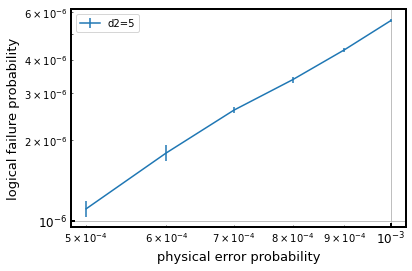

In [46]:
fig, ax = plt.subplots()
p_list = np.array([5e-04, 6e-04, 7e-04, 8e-04, 9e-04, 1e-03])
a = np.array(p_list)

for i in range(1,2):
    ax.errorbar(p_list, mean_matlix.T[i], yerr = se_matlix.T[i], marker='',label="d2="+str(2*i+3))

ax.set_xticklabels(np.round(a,decimals= 1))
ax.set_xticks(np.round(a,decimals= 2))
ax.set_xlabel("physical error probability", fontsize=13)
ax.set_ylabel("logical failure probability", fontsize=13)
#ax.set_ylim(10**(-3))
#ax.set_xlim(10**(-10))
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("pm=" + str(0) + "%, eta=" + str(1000) + ", repeat=" + str(1) + ", trials=" + str(10000), fontsize=14)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid()
plt.legend()
plt.show()

In [34]:
print(mean_matlix.T)
print(se_matlix.T)

[[1.41214399e-05 2.09393189e-05 2.77191825e-05 3.66505800e-05
  4.56708330e-05 5.75886312e-05]
 [1.10782593e-06 1.79125929e-06 2.58863471e-06 3.36231891e-06
  4.34671086e-06 5.58451376e-06]
 [5.01881986e-08 6.62907167e-08 1.00729148e-07 1.39986736e-07
  2.91258779e-07 3.83174209e-07]
 [4.70146117e-09 2.28765760e-17 4.46638833e-09 5.52421549e-09
  1.59849650e-08 1.51622183e-08]]
[[1.57256590e-07 2.60918428e-07 1.74689703e-07 1.87314344e-07
  4.48122763e-07 7.31628503e-07]
 [7.36990784e-08 1.18747765e-07 7.12836112e-08 8.62234021e-08
  8.24596231e-08 7.92352155e-08]
 [1.33791865e-08 1.03744681e-08 1.58012912e-08 2.08372727e-08
  4.75494133e-08 3.22301706e-08]
 [4.20511469e-09 0.00000000e+00 3.99485915e-09 4.94100852e-09
  5.83767282e-09 6.92848123e-09]]


1.7564291518863657


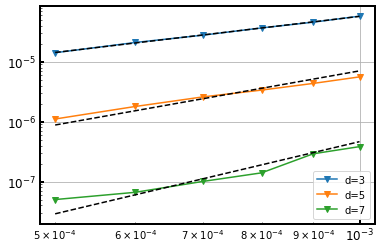

In [50]:
# 二乗誤差でフィット
e_3_mean = np.mean(np.log10(mean_matlix.T[0])-2*np.log10(p_list))
e_5_mean = np.mean(np.log10(mean_matlix.T[1])-3*np.log10(p_list))
e_7_mean = np.mean(np.log10(mean_matlix.T[2])-4*np.log10(p_list))
#e_9_mean = np.mean(np.log10(mean_matlix.T[3])-5*np.log10(p_list))
fig, ax = plt.subplots()
ax.plot(p_list, mean_matlix.T[0],marker='v',label="d="+str(3))
ax.plot(p_list, 10**e_3_mean*p_list**2,marker='',color='k',linestyle="dashed")
ax.plot(p_list, mean_matlix.T[1],marker='v',label="d="+str(5))
ax.plot(p_list, 10**e_5_mean*p_list**3,marker='',color='k',linestyle="dashed")
ax.plot(p_list, mean_matlix.T[2],marker='v',label="d="+str(7))
ax.plot(p_list, 10**e_7_mean*p_list**4,marker='',color='k',linestyle="dashed")
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("pm=" + str(0) + "%, eta=" + str(1000) + ", repeat=" + str(1) + ", trials=" + str(10000), fontsize=14)
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend()
plt.show()

In [100]:
k_1 = e_3_mean - e_5_mean
k_2 = e_5_mean - e_7_mean
k = (k_1+k_2)/2
print(k_1, k_2, k)
print(10**k_1, 10**k_2, 10**k)

logC_3 = e_3_mean + 2*k
logC_5 = e_5_mean + 3*k
logC_7 = e_7_mean + 4*k
print(logC_3, logC_5, logC_7)

logC = (logC_3+logC_5)/2
print(10**logC)

-2.0908759143798257 -1.8194890168600466 -1.9551824656199361
0.008111927968858821 0.015153431256573532 0.011087089015353773
-2.1539357793535068 -2.0182423305936172 -2.1539357793535068
0.008201833430325448


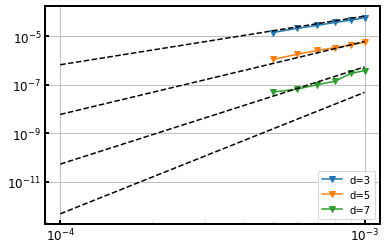

In [99]:
fig, ax = plt.subplots()
ax.plot(p_list, mean_matlix.T[0],marker='v',label="d="+str(3))
ax.plot(p_list, mean_matlix.T[1],marker='v',label="d="+str(5))
ax.plot(p_list, mean_matlix.T[2],marker='v',label="d="+str(7))
#ax.plot(p_list, mean_matlix.T[3],marker='v',label="d="+str(9))
p_list_ = np.arange(0.0001, 0.0011, 0.0001)
ax.plot(p_list_, 10**logC*(p_list_/(10**k))**2,marker='',color='k',linestyle="dashed")
ax.plot(p_list_, 10**logC*(p_list_/(10**k))**3,marker='',color='k',linestyle="dashed")
ax.plot(p_list_, 10**logC*(p_list_/(10**k))**4,marker='',color='k',linestyle="dashed")
ax.plot(p_list_, 10**logC*(p_list_/(10**k))**5,marker='',color='k',linestyle="dashed")
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend()
plt.show()

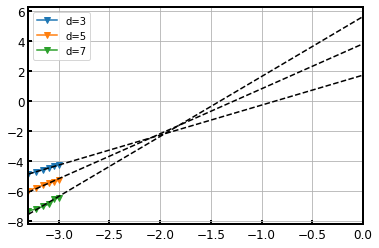

In [71]:
e_3_mean = np.mean(np.log10(mean_matlix.T[0])-2*np.log10(p_list))
e_5_mean = np.mean(np.log10(mean_matlix.T[1])-3*np.log10(p_list))
e_7_mean = np.mean(np.log10(mean_matlix.T[2])-4*np.log10(p_list))
#e_9_mean = np.mean(np.log10(mean_matlix.T[3])-5*np.log10(p_list))
p_list_ = np.append(p_list,0.99)
fig, ax = plt.subplots()
ax.plot(np.log10(p_list), np.log10(mean_matlix.T[0]),marker='v',label="d="+str(3))
ax.plot(np.log10(p_list_), 2*np.log10(p_list_)+e_3_mean,marker='',color='k',linestyle="dashed")
ax.plot(np.log10(p_list), np.log10(mean_matlix.T[1]),marker='v',label="d="+str(5))
ax.plot(np.log10(p_list_), 3*np.log10(p_list_)+e_5_mean,marker='',color='k',linestyle="dashed")
ax.plot(np.log10(p_list), np.log10(mean_matlix.T[2]),marker='v',label="d="+str(7))
ax.plot(np.log10(p_list_), 4*np.log10(p_list_)+e_7_mean,marker='',color='k',linestyle="dashed")
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.set_xlim(-3.3,0)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("pm=" + str(0) + "%, eta=" + str(1000) + ", repeat=" + str(1) + ", trials=" + str(10000), fontsize=14)
ax.grid()
plt.legend()
plt.show()